In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, date, timedelta, time
import warnings
warnings.filterwarnings('ignore')

# Processing Shift Data 

In [2]:
dfShift = pd.read_csv('shift.csv')

In [3]:
dfShift = dfShift.drop(["identifier", "group"], axis = 1)

In [4]:
dfShift["startAt"] = pd.to_datetime(dfShift["startAt"]).dt.tz_convert('America/New_York')
dfShift["endAt"] = pd.to_datetime(dfShift["endAt"]).dt.tz_convert('America/New_York')
dfShift["shift_length"] = (dfShift["endAt"] - dfShift["startAt"]).dt.total_seconds().div(60).astype(int)

In [5]:
dfShift["Day of the Week"] = dfShift["startAt"].dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dfShift["Day of the Week"] = dfShift["Day of the Week"].apply(lambda x: days[x])

In [6]:
dfShift["startAt"] = dfShift["startAt"].astype(str)
dfShift["endAt"] = dfShift["endAt"].astype(str)
dfShift.startAt = dfShift.startAt.str[:19]
dfShift.endAt = dfShift.endAt.str[:19]

In [7]:
#selecting specific week you want
start_date = '2023-10-19 00:00:00'
dfWeek = dfShift[dfShift["startAt"] > start_date]

In [8]:
pd.set_option('display.max_rows', None)

# Processing Interaction Data

In [9]:
def weekly_filter(df):
    today = date.today()
    idx = (today.weekday())
    tzinfo = df['startedAt'].iloc[0].tzinfo
    wednesday = datetime.combine(today - timedelta(days = idx-3), time(23,59,59), tzinfo=tzinfo)
    thursday = datetime.combine(today - timedelta(days = idx+4), time(), tzinfo=tzinfo)
    dfFiltered = df[df['startedAt'].apply(lambda x: (x>=thursday)&(x<=wednesday))].copy()
    return (dfFiltered, thursday, wednesday)

In [10]:
dfInteractions = pd.read_csv('interactions.csv')

dfInteractions = dfInteractions[dfInteractions["status"] == "completed"]
dfInteractions["TA"] = dfInteractions["teacherFirstName"] + " " + dfInteractions["teacherLastName"]

In [11]:
dfInteractions.startedAt = pd.to_datetime(dfInteractions.startedAt).dt.tz_convert('America/New_York')
dfInteractions.completedAt = pd.to_datetime(dfInteractions.completedAt).dt.tz_convert('America/New_York')
dfInteractions.requestedAt = pd.to_datetime(dfInteractions.requestedAt).dt.tz_convert('America/New_York')

dfInteractions["day"] = dfInteractions["requestedAt"].dt.day_name()

In [12]:
df_weekly_interactions, thursday, wednesday = weekly_filter(dfInteractions)

In [13]:
df_weekly_interactions = df_weekly_interactions[["startedAt", "completedAt", "requestedAt", "TA", "day"]].dropna()
df_weekly_interactions["Wait time (mins)"] = (df_weekly_interactions["startedAt"] - df_weekly_interactions["requestedAt"]).dt.total_seconds().div(60).astype(int)
df_weekly_interactions["Interaction time (mins)"] = (df_weekly_interactions["completedAt"] - df_weekly_interactions["startedAt"]).dt.total_seconds().div(60).astype(int)

In [14]:
print("Number of interactions this week:", str(df_weekly_interactions.shape[0]))
print("Average wait time:", str(round(df_weekly_interactions["Wait time (mins)"].mean(), 2)))
print("Average interaction time:", str(round(df_weekly_interactions["Interaction time (mins)"].mean(),2)))

Number of interactions this week: 193
Average wait time: 4.58
Average interaction time: 15.79


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Student Wait Times for UTA Office Hours')

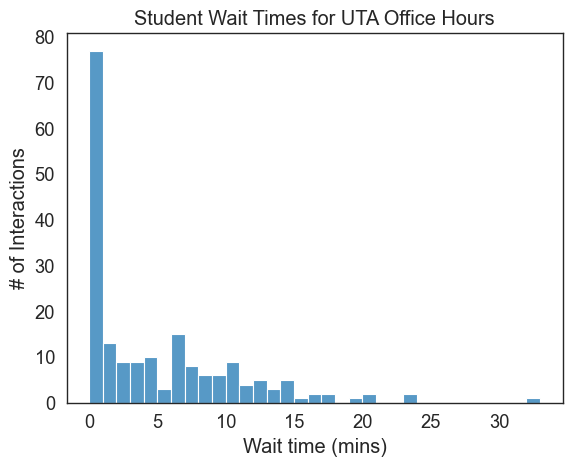

In [16]:
sns.set_style("white")
sns.set_context("paper", font_scale= 1.5)
sns.histplot(data = df_weekly_interactions, x = "Wait time (mins)", binwidth = 1)
plt.ylabel('# of Interactions')
plt.title("Student Wait Times for UTA Office Hours")

Text(0.5, 1.0, 'Lengths of UTA-Student Interactions')

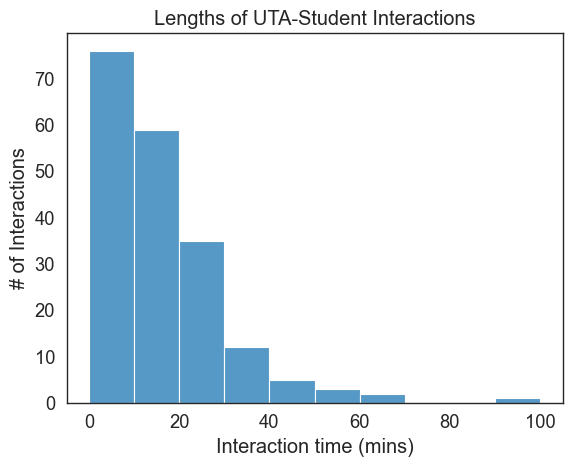

In [17]:
sns.histplot(data = df_weekly_interactions, x = "Interaction time (mins)", binwidth = 10)
plt.ylabel('# of Interactions')
plt.title("Lengths of UTA-Student Interactions")

In [18]:
df_hour = df_weekly_interactions[["day","requestedAt", "TA", "Wait time (mins)"]]

In [19]:
df_hour["requestedAt"] = df_hour["requestedAt"].astype(str)
df_hour.requestedAt = df_hour.requestedAt.str[11:19]

In [20]:
pd.set_option('display.max_rows', None)
#df_hour

In [21]:
#df_weekly_interactions